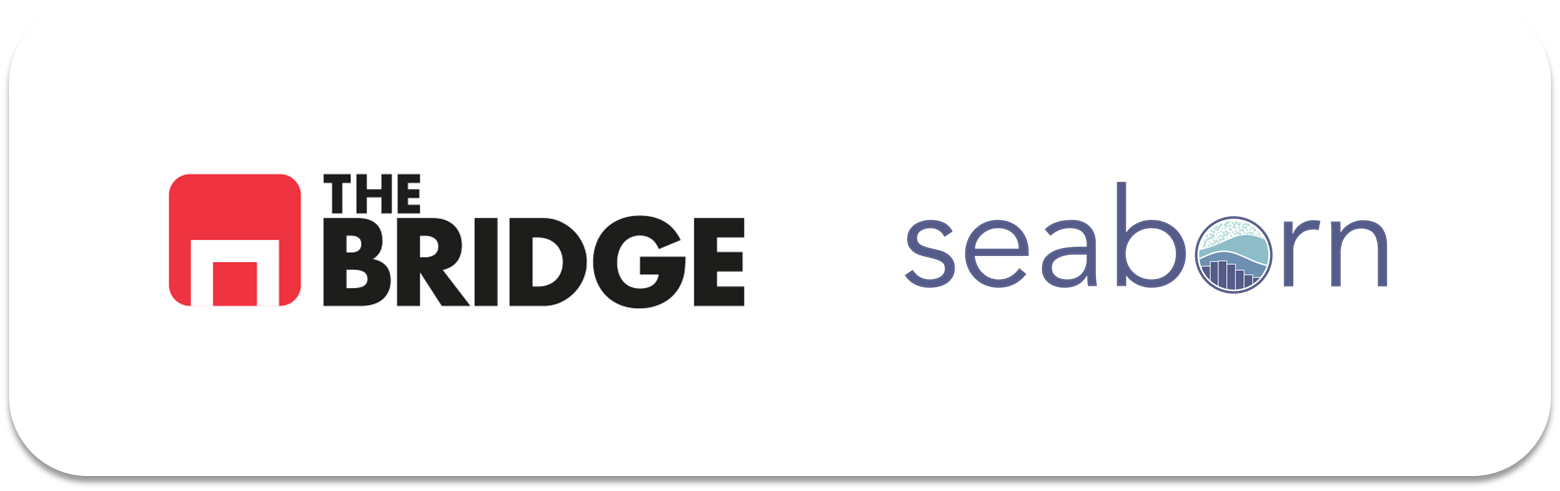

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [160]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot

## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [141]:
df = pd.read_csv("./data/california_cities.csv")
df.dropna(inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          427 non-null    int64  
 1   city                427 non-null    object 
 2   latd                427 non-null    float64
 3   longd               427 non-null    float64
 4   elevation_m         427 non-null    float64
 5   elevation_ft        427 non-null    float64
 6   population_total    427 non-null    int64  
 7   area_total_sq_mi    427 non-null    float64
 8   area_land_sq_mi     427 non-null    float64
 9   area_water_sq_mi    427 non-null    float64
 10  area_total_km2      427 non-null    float64
 11  area_land_km2       427 non-null    float64
 12  area_water_km2      427 non-null    float64
 13  area_water_percent  427 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 50.0+ KB


### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [142]:

def diagrama_dispersion_2(df, col_numerica1, col_numerica2, col_categorica=None, puntos_size=40, escala=1, mostrar_leyenda=True):
    plt.figure(figsize=(12, 6))

    if isinstance(puntos_size, str):
        # Si puntos_size es el nombre de una columna
        scatter = sns.scatterplot(
            data=df,
            x=col_numerica1,
            y=col_numerica2,
            hue=col_categorica,
            size=puntos_size,
            sizes=(20 * escala, 400 * escala),
            alpha=0.7,
            edgecolor="white",
            palette='viridis' if col_categorica else None
        )
    else:
        # Si puntos_size es un número fijo
        scatter = sns.scatterplot(
            data=df,
            x=col_numerica1,
            y=col_numerica2,
            hue=col_categorica,
            s=puntos_size,
            alpha=0.7,
            edgecolor="white",
            palette='viridis' if col_categorica else None
        )

    plt.title(f'Diagrama de dispersión: {col_numerica1} vs {col_numerica2}')
    plt.xlabel(col_numerica1)
    plt.ylabel(col_numerica2)
    plt.grid(True)

    if not mostrar_leyenda:
        if col_categorica:
            plt.colorbar(scatter.collections[0].colorbar, label=col_categorica)
        plt.legend([], [], frameon=False)

    plt.show()


### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

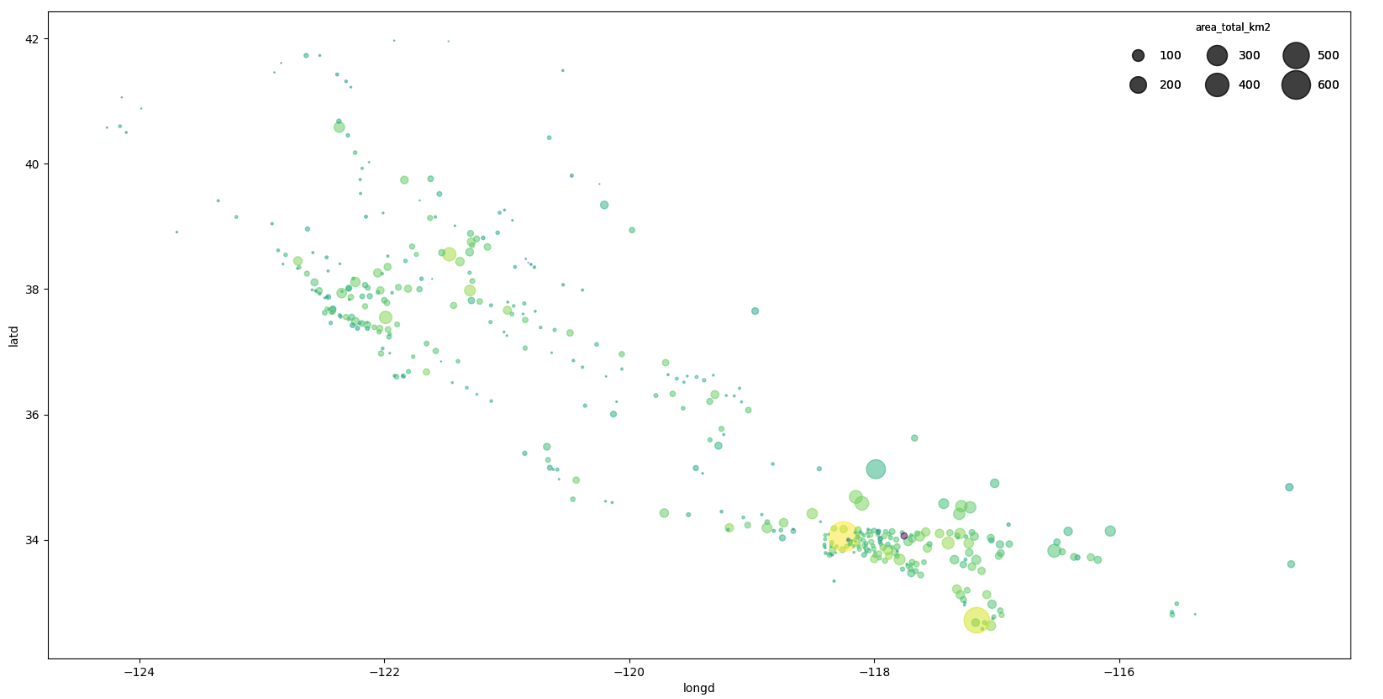

In [143]:

df['log_poblacion'] = np.log10(df['population_total'])
df



Unnamed: 0         city       latd       longd  elevation_m  \
0             0     Adelanto  34.576111 -117.432778        875.0   
1             1  AgouraHills  34.153333 -118.761667        281.0   
4             4     Alhambra  34.081944 -118.135000        150.0   
5             5   AlisoViejo  33.575000 -117.725556        127.0   
6             6      Alturas  41.487222 -120.542500       1332.0   
..          ...          ...        ...         ...          ...   
477         477   Yountville  38.403056 -122.362222         30.0   
478         478        Yreka  41.726667 -122.637500        787.0   
479         479     YubaCity  39.134722 -121.626111         18.0   
480         480      Yucaipa  34.030278 -117.048611        798.0   
481         481  YuccaValley  34.133333 -116.416667       1027.0   

     elevation_ft  population_total  area_total_sq_mi  area_land_sq_mi  \
0          2871.0             31765            56.027           56.009   
1           922.0             20330             7.822            7.793   
4           492.0             83089             7.632            7.631   
5           417.0             47823             7.472            7.472   
6          4370.0              2827             2.449            2.435   
..            ...               ...               ...              ...   
477          98.0              2933             1.531            1.531   
478        2582.0              7765            10.053            9.980   
479          59.0             64925            14.656           14.578   
480        2618.0             51367            27.893           27.888   
481        3369.0             20700            40.015           40.015   

     area_water_sq_mi  area_total_km2  area_land_km2  area_water_km2  \
0               0.018         145.107        145.062           0.046   
1               0.029          20.260         20.184           0.076   
4               0.001          19.766         19.763           0.003   
5               0.000          19.352         19.352           0.000   
6               0.014           6.342          6.306           0.036   
..                ...             ...            ...             ...   
477             0.000           3.966          3.966           0.000   
478             0.073          26.036         25.847           0.188   
479             0.078          37.959         37.758           0.201   
480             0.005          72.244         72.231           0.013   
481             0.000         103.639        103.639           0.000   

     area_water_percent  log_poblacion  
0                  0.03       4.501949  
1                  0.37       4.308137  
4                  0.01       4.919544  
5                  0.00       4.679637  
6                  0.57       3.451326  
..                  ...            ...  
477                0.00       3.467312  
478                0.72       3.890141  
479                0.53       4.812412  
480                0.02       4.710684  
481                0.00       4.315970  

[427 rows x 15 columns]

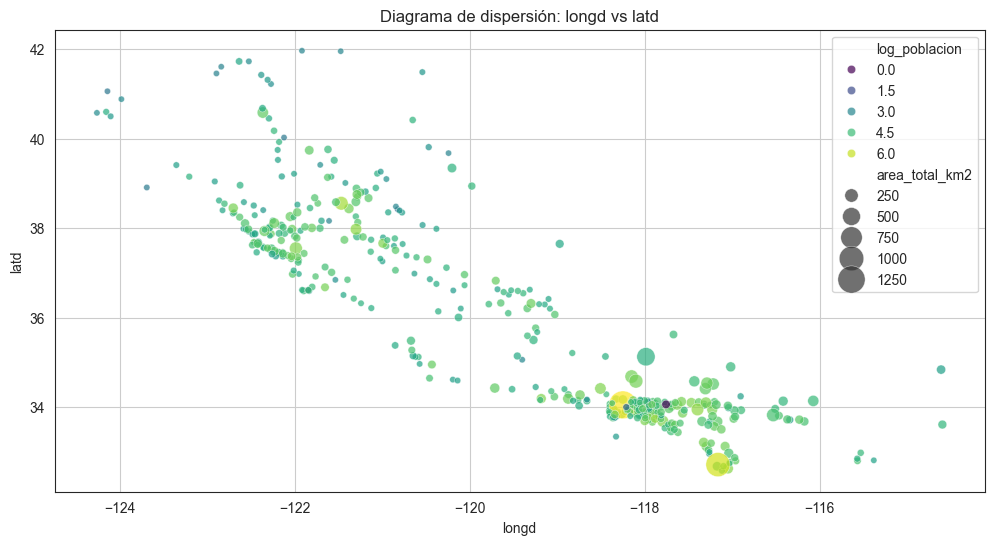

In [144]:
# Llamada con la nueva función
diagrama_dispersion_2(
    df=df,
    col_numerica1='longd',
    col_numerica2='latd',
    col_categorica='log_poblacion',
    puntos_size='area_total_km2',  # Solo 'area_total_km2' aparecerá en la leyenda de tamaño
    escala=1,
    mostrar_leyenda=True
)

## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [145]:
df_titanic = pd.read_csv('./data/titanic.csv')
df_titanic.dropna(inplace=True)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     182 non-null    int64  
 1   pclass       182 non-null    int64  
 2   sex          182 non-null    object 
 3   age          182 non-null    float64
 4   sibsp        182 non-null    int64  
 5   parch        182 non-null    int64  
 6   fare         182 non-null    float64
 7   embarked     182 non-null    object 
 8   class        182 non-null    object 
 9   who          182 non-null    object 
 10  adult_male   182 non-null    bool   
 11  deck         182 non-null    object 
 12  embark_town  182 non-null    object 
 13  alive        182 non-null    object 
 14  alone        182 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 20.3+ KB


In [146]:


# Establecer el estilo de Seaborn 
sns.set_style("white")

# Crear el gráfico
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))

# Calcular las frecuencias relativas
valores = df_titanic.alive.value_counts(normalize=True) * 100

# Crear el gráfico de barras
sns.barplot(x=valores.index, y=valores.values, hue=valores.index, ax=axs, palette="Blues_d")

# Añadir el título y la etiqueta del eje y
axs.set_ylim(0, 100)
axs.set_xlabel('')

# Añadir el porcentaje solo sobre la primera barra
for i, p in enumerate(axs.patches):
    if i == 0:  # Solo añadir la anotación al primer parche (primera barra)
        axs.annotate(f'{p.get_height():.2f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     fontsize=12, color='black', 
                     xytext=(0, 10), textcoords='offset points')

# Modificar las etiquetas del eje X
new_labels = ['No sobrevivió', '']
axs.set_xticks([0, 1])  
axs.set_xticklabels(new_labels, fontsize=14)  

# Eliminar el recuadro 
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.spines['left'].set_visible(False)
axs.spines['bottom'].set_visible(False)

# Quitar los números de los ejes X y Y
axs.set_yticks([])  # Eliminar números en el eje Y


# Eliminar la cuadrícula
axs.grid(False)

plt.savefig('grafico_1.png')
plt.close() 


In [147]:
# Calcular la cantidad total y la cantidad de supervivientes por sexo
total_por_sex = df_titanic['who'].value_counts()
supervivientes_por_sex = df_titanic.groupby('who')['survived'].sum()

# Calcular el porcentaje de supervivientes por sexo
porcentaje_supervivientes_sex = (supervivientes_por_sex / total_por_sex) * 100

# Ordenar los valores de porcentaje de mayor a menor
porcentaje_supervivientes_sex = porcentaje_supervivientes_sex.sort_values(ascending=False)

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=porcentaje_supervivientes_sex.index, y=porcentaje_supervivientes_sex.values, ax=ax)

ax.set_ylim(0,100)

# Añadir título y etiquetas
ax.set_title("Porcentaje de Supervivientes", fontsize=16)
ax.set_xlabel('', fontsize=14)


# Corregir el problema de set_xticklabels con las ubicaciones de los ticks
ax.set_xticks([0, 1, 2])  # Establecer las posiciones específicas para las etiquetas
ax.set_xticklabels(["Niños", "Mujeres", "Hombres"], fontsize=12)  # Modificar las etiquetas para X

# Añadir los porcentajes sobre las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',  # Mostramos el porcentaje
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 10), textcoords='offset points')

# Eliminar recuadro y mostrar el gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_yticks([])

# Eliminar los números del eje Y
ax.set_yticks([])

plt.tight_layout()
plt.savefig('grafico_2.png')
plt.close() 


In [163]:
df_titanic

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
1           1       1  female  38.0      1      0  71.2833        C  First   
3           1       1  female  35.0      1      0  53.1000        S  First   
6           0       1    male  54.0      0      0  51.8625        S  First   
10          1       3  female   4.0      1      1  16.7000        S  Third   
11          1       1  female  58.0      0      0  26.5500        S  First   
..        ...     ...     ...   ...    ...    ...      ...      ...    ...   
871         1       1  female  47.0      1      1  52.5542        S  First   
872         0       1    male  33.0      0      0   5.0000        S  First   
879         1       1  female  56.0      0      1  83.1583        C  First   
887         1       1  female  19.0      0      0  30.0000        S  First   
889         1       1    male  26.0      0      0  30.0000        C  First   

       who  adult_male deck  embark_town alive  alone  
1    woman       False    C    Cherbourg   yes  False  
3    woman       False    C  Southampton   yes  False  
6      man        True    E  Southampton    no   True  
10   child       False    G  Southampton   yes  False  
11   woman       False    C  Southampton   yes   True  
..     ...         ...  ...          ...   ...    ...  
871  woman       False    D  Southampton   yes  False  
872    man        True    B  Southampton    no   True  
879  woman       False    C    Cherbourg   yes  False  
887  woman       False    B  Southampton   yes   True  
889    man        True    C    Cherbourg   yes   True  

[182 rows x 15 columns]

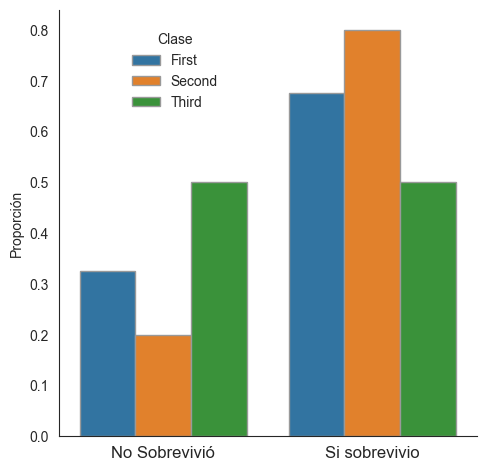

In [213]:
cat_colx = 'alive'
cat_coly = 'class'


frecuencias_relativas = df_titanic.groupby([cat_coly, cat_colx]).size().reset_index(name='frecuencia')
frecuencias_relativas['proporcion'] = frecuencias_relativas.groupby(cat_coly)['frecuencia'].transform(lambda x: x / x.sum())


g = sns.catplot(
    data=frecuencias_relativas,
    x='alive',
    y='proporcion',
    hue='class',
    kind='bar',
    edgecolor='.6',
    height=5,    
    aspect=1    
)

g.set_axis_labels("", "Proporción")
g.set_xticklabels(["No Sobrevivió",'Si sobrevivio'], fontsize=12)

# Mover la leyenda al centro izquierda
g._legend.set_title("Clase")
g._legend.set_bbox_to_anchor((0.2, 0.8))
g._legend.set_loc('center left')

# Guardar gráfico como imagen PNG
g.savefig("grafico_3.png", dpi=300, bbox_inches='tight')  # dpi=300 para alta calidad

plt.show()



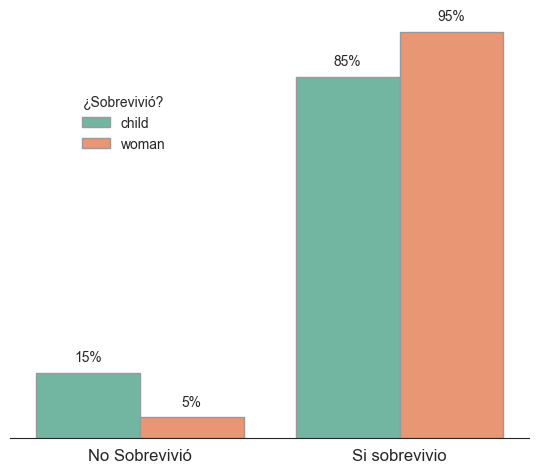

In [240]:

df_mujeres_ninios = df_titanic[df_titanic['who'].isin(['woman', 'child'])]


tasas_supervivencia = df_mujeres_ninios.groupby(['who', 'alive']).size().reset_index(name='frecuencia')
tasas_supervivencia['proporcion'] = tasas_supervivencia.groupby('who')['frecuencia'].transform(lambda x: x / x.sum())

g = sns.catplot(
    data=tasas_supervivencia,
    x='alive',
    y='proporcion',
    hue='who',
    kind='bar',
    palette='Set2',
    edgecolor='.6',
    height=5,
    aspect=1.2
)



g.set_xticklabels(["No Sobrevivió",'Si sobrevivio'], fontsize=12)

g.set_axis_labels("", "")
g._legend.set_title("¿Sobrevivió?")
g._legend.set_bbox_to_anchor((0.1, 0.7))
g._legend.set_loc('center left')

# Agregar porcentaje encima de cada barra
for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        if not pd.isna(height) and height > 0:
            ax.text(
                p.get_x() + p.get_width() / 2,
                height + 0.02,  # ajustar altura
                f"{height:.0%}",  # formato porcentaje
                ha='center',
                va='bottom',
                fontsize=10
            )

# Eliminar recuadro
g.despine()

# Eliminar la línea del eje Y
for ax in g.axes.flat:
    ax.spines['left'].set_visible(False)

# Eliminar los ticks del eje Y
for ax in g.axes.flat:
    ax.set_yticks([])

# Guardar el gráfico
g.savefig("grafico_4.png", dpi=300, bbox_inches='tight')

plt.show()
